In [1]:
#checking the ta-lib installation is correct

import talib
print("TA-Lib version:", talib.__version__)


TA-Lib version: 0.5.1


In [2]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

# Importing the module
import finance_utils as fu

# Loading stock price data
file_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\NVDA_historical_data.csv'
stock_data = fu.load_stock_data(file_path)

# Prepare the data
prepared_data = fu.prepare_stock_data(stock_data) 


# Display the first few rows of the processed data
print(prepared_data.head())


        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1 1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2 1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3 1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4 1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
# Import the module
import technical_analysis_indicator as ta

# Add a 20-day Simple Moving Average (SMA) to the prepared data
prepared_data = ta.add_sma(prepared_data, period=20)

# Add a 14-day Relative Strength Index (RSI) to the prepared data
prepared_data = ta.add_rsi(prepared_data, period=14)

# Add Bollinger Bands to the prepared data
prepared_data = ta.add_bollinger_bands(prepared_data, period=20)

# Add MACD to the prepared data
prepared_data = ta.add_macd(prepared_data)


# To handle NaN values
prepared_data = prepared_data.dropna()

# Display the first few rows
print(prepared_data.head(10))


         Date      Open      High       Low     Close  Adj Close     Volume  \
33 1999-03-11  0.044401  0.045182  0.043229  0.043229   0.039651   54288000   
34 1999-03-12  0.043490  0.043490  0.041667  0.042448   0.038934   90768000   
35 1999-03-15  0.043490  0.044792  0.043229  0.044271   0.040607  108816000   
36 1999-03-16  0.044531  0.045052  0.042448  0.042839   0.039293   79152000   
37 1999-03-17  0.043229  0.044010  0.042057  0.043099   0.039532   51360000   
38 1999-03-18  0.043229  0.044271  0.042188  0.043620   0.040009   46320000   
39 1999-03-19  0.043490  0.045052  0.043490  0.043750   0.040129  105312000   
40 1999-03-22  0.044661  0.044792  0.042448  0.042448   0.038934   36672000   
41 1999-03-23  0.042708  0.042708  0.039063  0.039844   0.036546  163968000   
42 1999-03-24  0.039583  0.039844  0.038021  0.039583   0.036307   60864000   

    Dividends  Stock Splits    SMA_20        RSI  BB_upper  BB_middle  \
33        0.0           0.0  0.044316  48.888877  0.04855

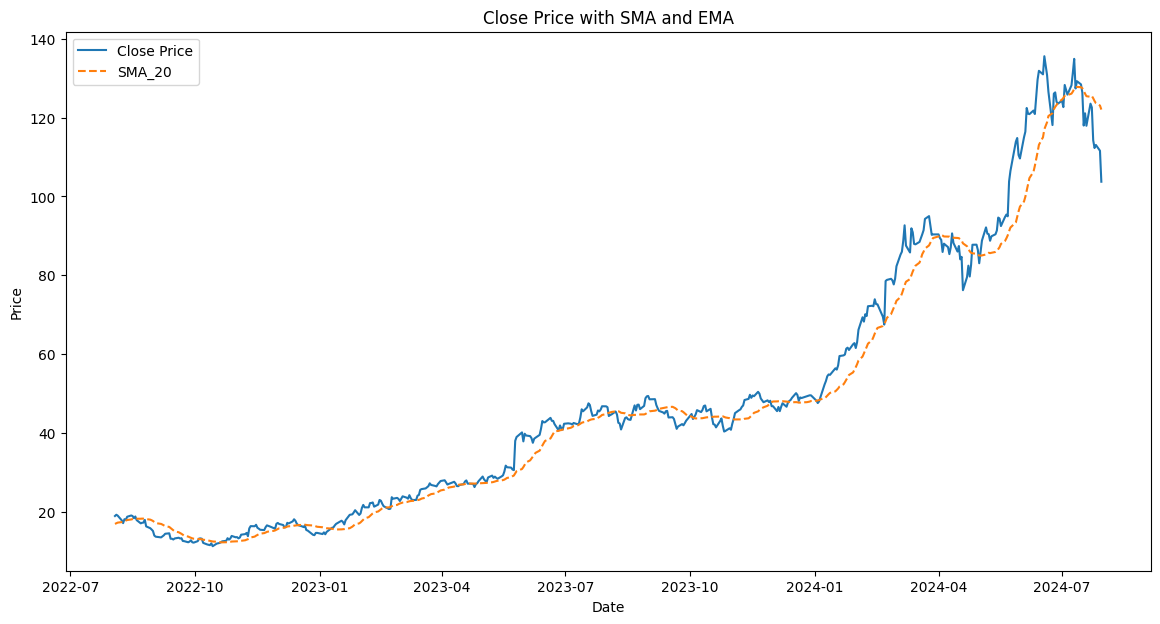

In [4]:
import visualization_utils as vu

# plot of the stock's close price with SMA and EMA with limited rows
vu.plot_close_with_moving_averages(prepared_data, num_rows=500)


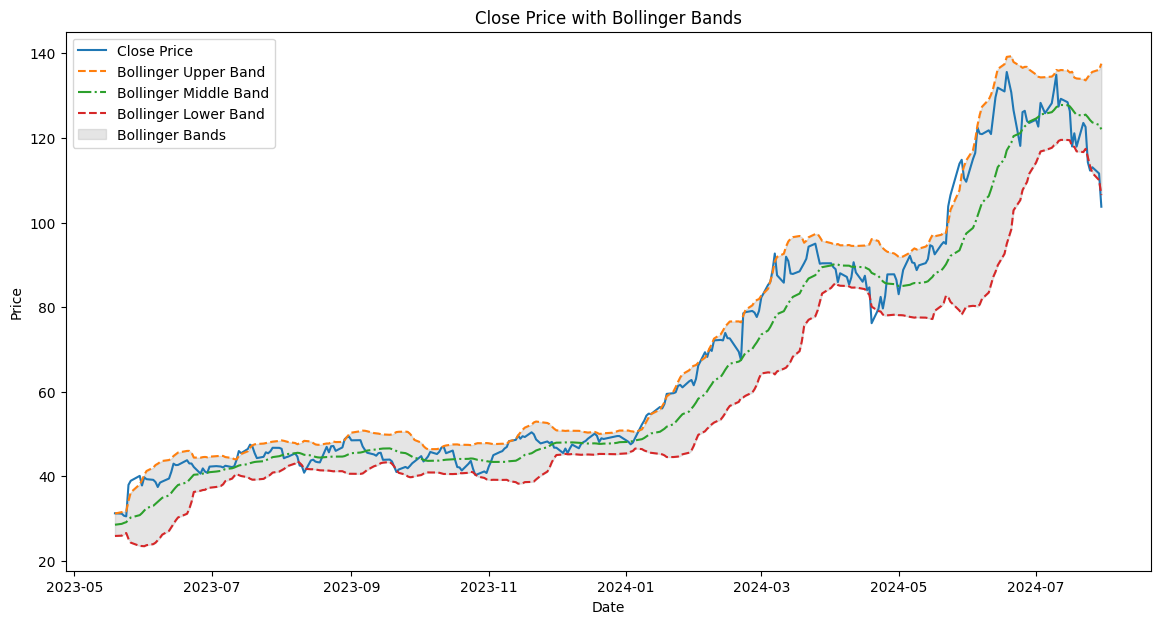

In [5]:
# plot of the stock's close price with Bollinger Bands with limited rows
vu.plot_bollinger_bands(prepared_data, num_rows=300)



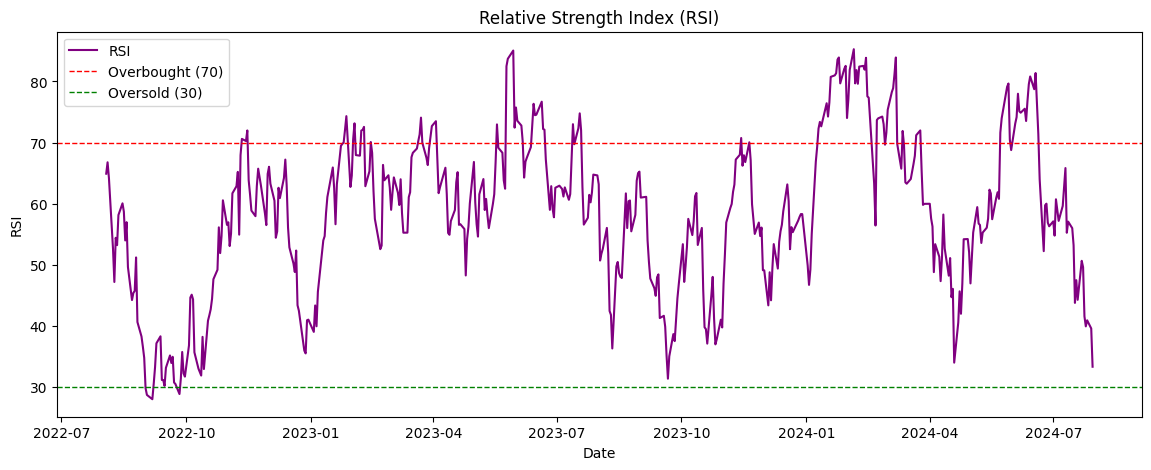

In [7]:
# plot of the RSI (Relative Strength Index) with limited rows
vu.plot_rsi(prepared_data, num_rows=500)

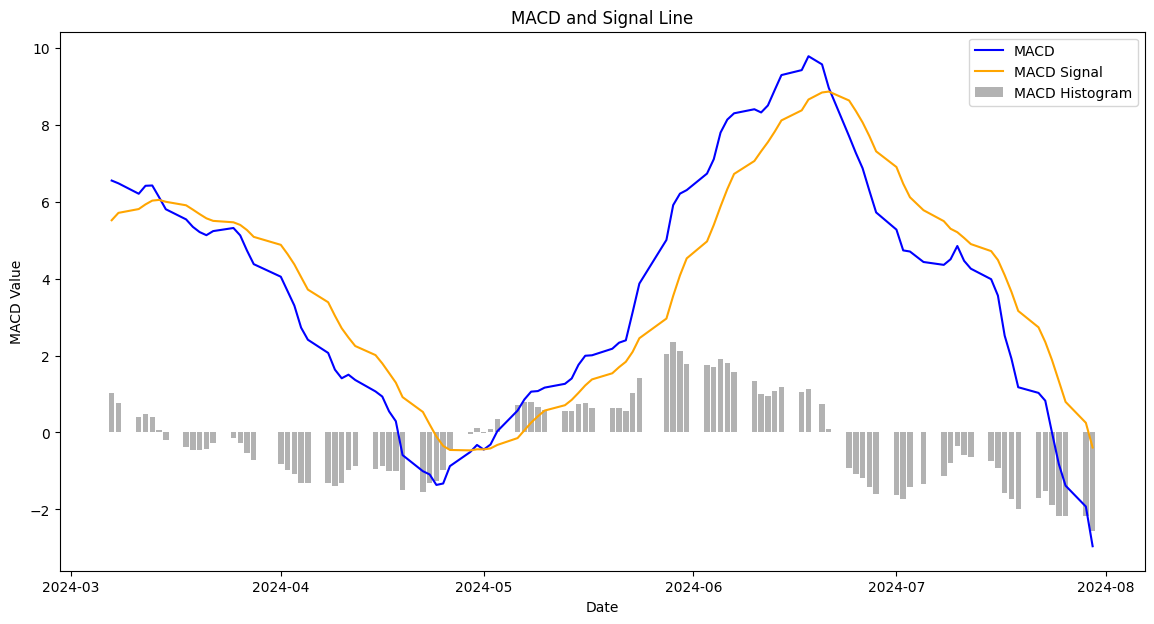

In [8]:
# plot the MACD (Moving Average Convergence Divergence) with limited rows
vu.plot_macd(prepared_data, num_rows=100)

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-01\scripts\visualization_utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])


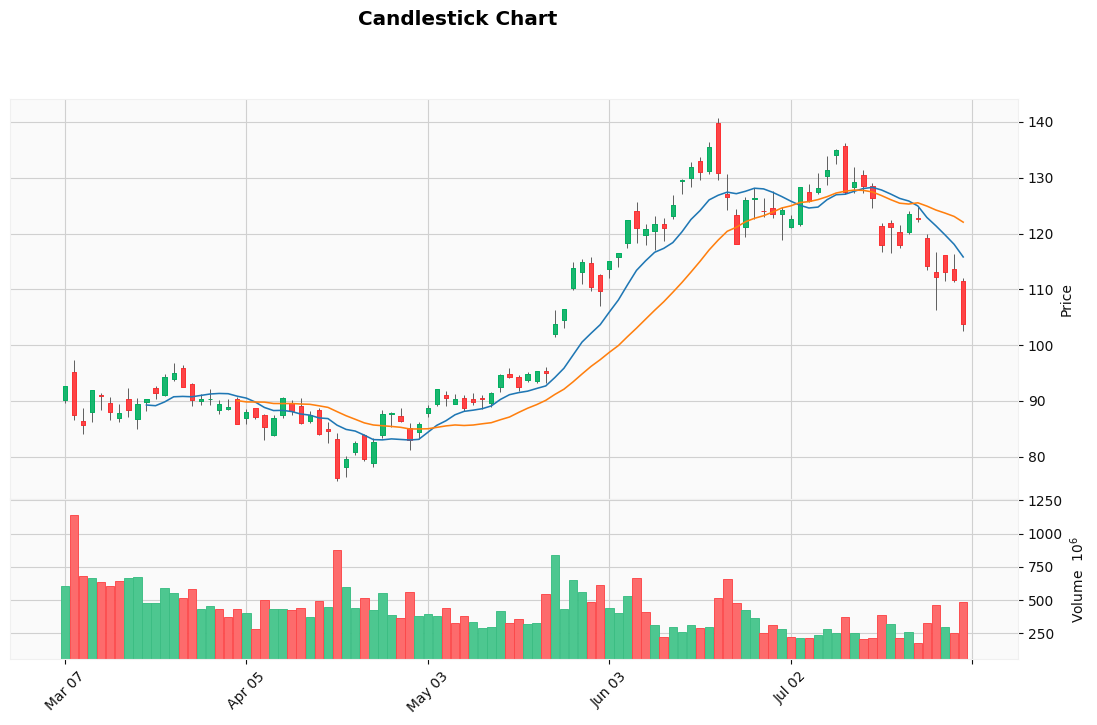

In [10]:
# plot of the candlestick chart with limited rows
vu.plot_candlestick_chart(prepared_data, num_rows=100)

In [11]:
# financial analysis using pynance 

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

import importlib
import pynance_analysis as pa
importlib.reload(pa)

# define stock symbol and data range
symbol = 'NVDA'
start_date = '2023-01-01'
end_date = '2023-12-31'

# fetch data using fetch_data function
data = pa.fetch_data(symbol, start_date, end_date)

# check the fetched data
print(data.head())
print(data.columns)



        Date     Open     High      Low    Close        Volume
0 2023-12-29  49.8107  49.9947  48.7487  49.5197  3.893116e+08
1 2023-12-28  49.6407  49.8816  49.4097  49.5197  2.465991e+08
2 2023-12-27  49.5087  49.6777  49.0827  49.4147  2.336589e+08
3 2023-12-26  48.9657  49.5977  48.9577  49.2767  2.442110e+08
4 2023-12-22  49.1927  49.3807  48.4647  48.8277  2.525186e+08
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [12]:
# function for calculating technical indicator
data = pa.calculate_indicators(data)
print(data.head())


         Date     Open     High      Low    Close        Volume     SMA_20  \
19 2023-12-01  46.5187  47.1937  46.1807  46.7587  3.693668e+08  48.067840   
20 2023-11-30  48.0175  48.1035  46.4157  46.7637  5.263176e+08  47.930040   
21 2023-11-29  48.3724  48.7554  47.8536  48.1335  3.820562e+08  47.860730   
22 2023-11-28  48.2295  48.3164  47.4666  47.8146  4.015450e+08  47.780725   
23 2023-11-27  47.7936  48.5234  47.6456  48.2355  3.957152e+08  47.728665   

       EMA_20        RSI  BB_middle   BB_upper   BB_lower      MACD  \
19  47.675178  41.122493  48.067840  50.893655  45.242025 -0.852978   
20  47.588371  44.242393  47.930040  50.726389  45.133691 -0.817279   
21  47.640288  43.648006  47.860730  50.558146  45.163314 -0.670725   
22  47.656889  40.090327  47.780725  50.377101  45.184349 -0.573699   
23  47.711995  46.934286  47.728665  50.239073  45.218257 -0.457567   

    MACD_signal  MACD_hist  
19    -0.629936  -0.223042  
20    -0.667404  -0.149875  
21    -0.668069  

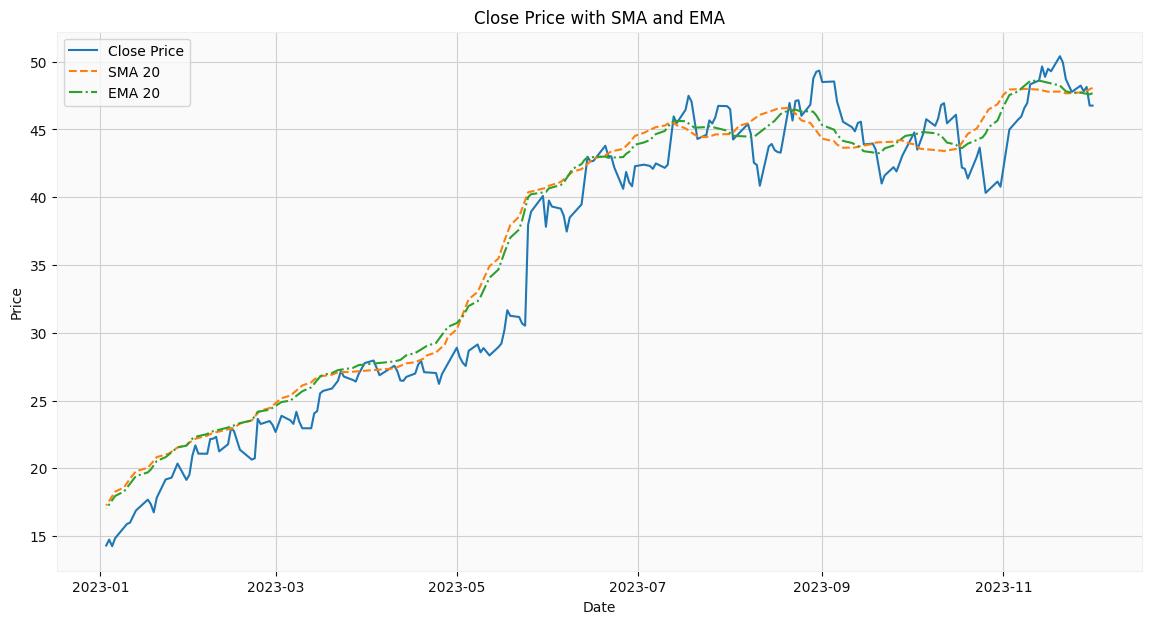

In [13]:
# visulazation of close price with sma amd ema 
pa.plot_close_with_indicators(data)

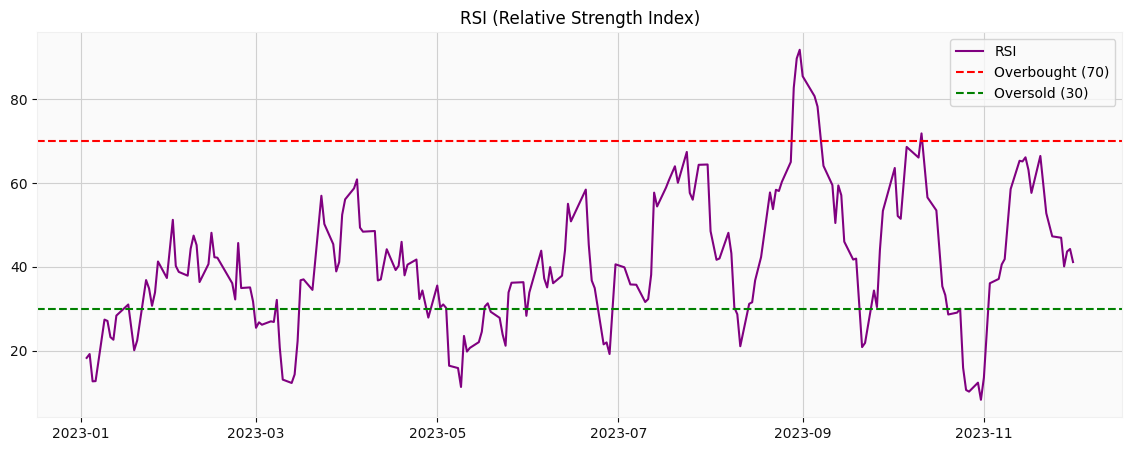

In [14]:

pa.plot_rsi(data)

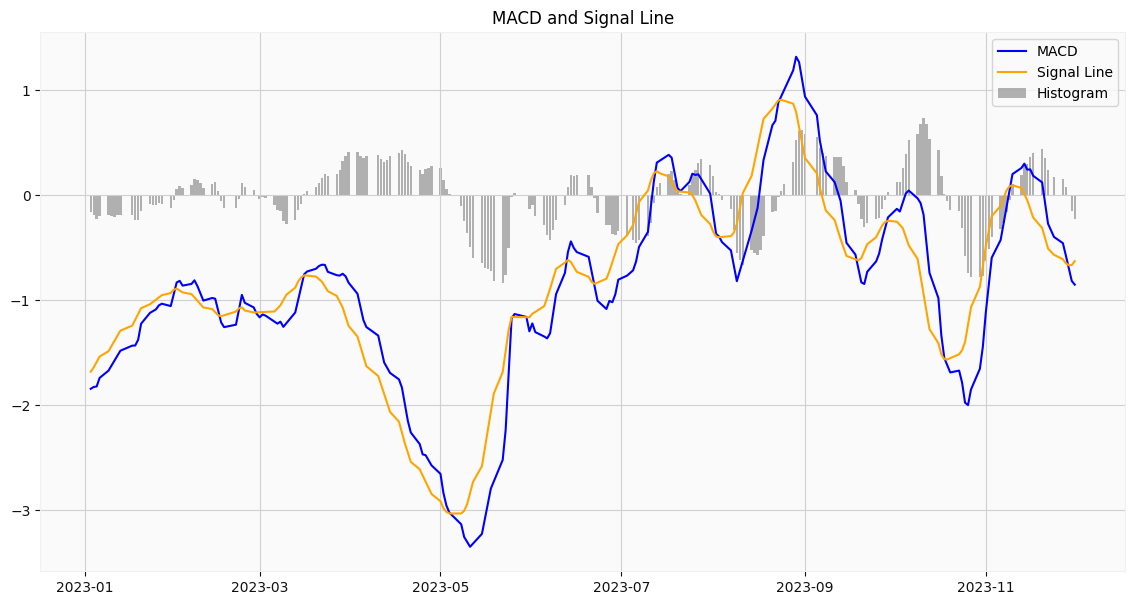

In [16]:
pa.plot_macd(data)

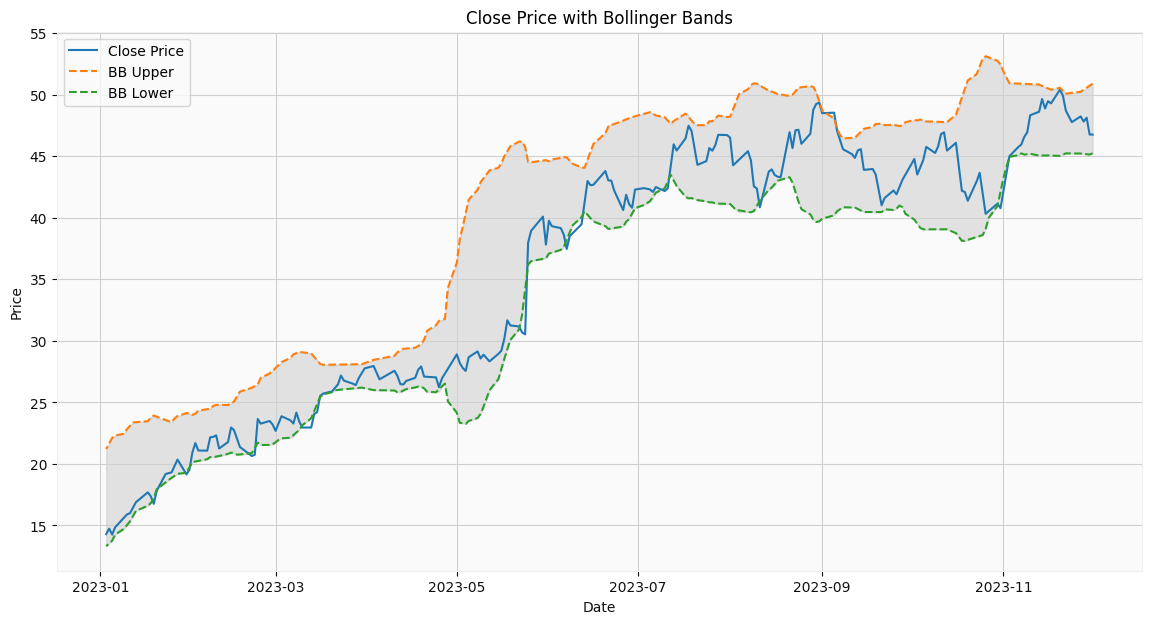

In [17]:
pa.plot_bollinger_bands(data)

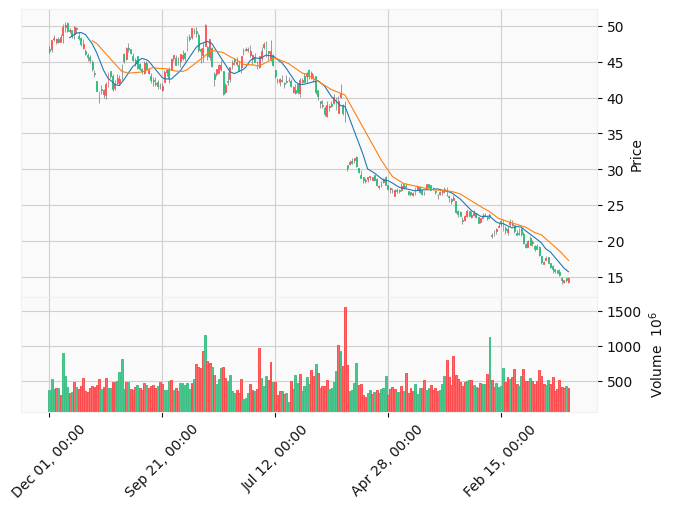

In [18]:
pa.plot_candlestick_chart(data)